In [ ]:

import math
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:

square_feet = [
    1100,1400,1425,1550,1600,1700,1750,1800,1875,2000,
    2100,2250,2300,2400,2450,2600,2800,2900,3000,3150,3300
]

prices = [
    199000,245000,230000,215000,280000,295000,345000,315000,325000,360000,
    350000,385000,390000,425000,415000,455000,465000,495000,510000,545000,570000
]

Number of samples: 21


In [ ]:

def standardize(xs):
    mean_x = sum(xs) / len(xs)
    std_x = math.sqrt(sum((x - mean_x) ** 2 for x in xs) / len(xs))
    if std_x == 0:
        raise ValueError("Standard deviation is zero; cannot standardize.")
    x_scaled = [(x - mean_x) / std_x for x in xs]
    return x_scaled, mean_x, std_x

def mse_loss(y_true, y_pred):
    n = len(y_true)
    return sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n


In [ ]:

learning_rate = 0.01
epochs = 20000
verbose = True

x_scaled, mean_x, std_x = standardize(square_feet)

print(f"mean_x = {mean_x:.3f}, std_x = {std_x:.3f}")


mean_x = 2164.286, std_x = 611.476


In [ ]:

m = 0.0
b = 0.0
loss_history = []

for epoch in range(epochs):
    preds = [m * x_scaled[i] + b for i in range(n)]
    loss = mse_loss(prices, preds)
    loss_history.append(loss)


    diff = [preds[i] - prices[i] for i in range(n)]
    dm = (2.0 / n) * sum(diff[i] * x_scaled[i] for i in range(n))
    db = (2.0 / n) * sum(diff)


    m -= learning_rate * dm
    b -= learning_rate * db


    if verbose and (epoch % (epochs // 5) == 0 or epoch == epochs - 1):
        print(f"Epoch {epoch:6d}  Loss: {loss:.2f}  m_scaled: {m:.6f}  b_scaled: {b:.6f}")


Epoch      0  Loss: 149696476190.48  m_scaled: 2093.367425  b_scaled: 7441.904762
Epoch   4000  Loss: 286142042.21  m_scaled: 104668.371226  b_scaled: 372095.238095
Epoch   8000  Loss: 286142042.21  m_scaled: 104668.371226  b_scaled: 372095.238095
Epoch  12000  Loss: 286142042.21  m_scaled: 104668.371226  b_scaled: 372095.238095
Epoch  16000  Loss: 286142042.21  m_scaled: 104668.371226  b_scaled: 372095.238095
Epoch  19999  Loss: 286142042.21  m_scaled: 104668.371226  b_scaled: 372095.238095


In [ ]:

m_orig = m / std_x
b_orig = b - m_orig * mean_x


x_test = 2500
pred_2500 = m_orig * x_test + b_orig
print(f"Predicted price for {x_test} sq ft: ${pred_2500:,.2f}")



preds_orig = [m_orig * x + b_orig for x in square_feet]
final_mse = mse_loss(prices, preds_orig)
print(f"Final MSE on training data: {final_mse:.2f}")

Predicted price for 2500 sq ft: $429,560.55
Final MSE on training data: 286142042.21


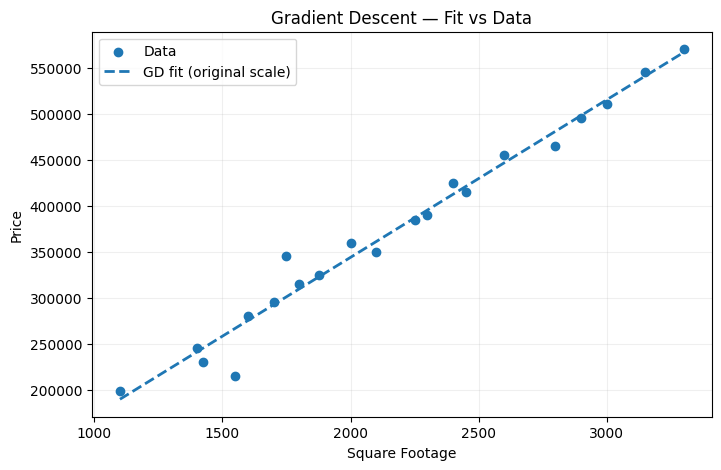

In [ ]:
# Plot data and learned fit (original x scale)
x_sorted = sorted(square_feet)
y_sorted = [y for _, y in sorted(zip(square_feet, prices))]
y_fit = [m_orig * x + b_orig for x in x_sorted]

plt.figure(figsize=(8,5))
plt.scatter(square_feet, prices, label="Data", zorder=5)
plt.plot(x_sorted, y_fit, linestyle="--", linewidth=2, label="GD fit (original scale)")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Gradient Descent — Fit vs Data")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
